NOTE: This notebook requires the installation of 

    1. pandas
    2. numpy
    3. matplotlib
    4. sklean
    5. scypi 
    6. graphviz
    7. itertools
    8. xlrd
    

From previous lectures, you should have already installed 1 through 5.  
Graphviz, xlrd, and intertools can be installed via pip. 

Graphiz though, requires the installation of graphivz software and for this installation graphiph/viz directory to be on the users path. The lab currently doesn't have graphviz installed. It should be installed this week. Without graphviz you will not be able to develop a visualization of the decision tree that you see in these notes.


    

## Objective

Our objective is to create a predictive model that will identify factors that lead to earl death.

We will define someone as having lived to an "old age" as those that had an age of death in the top 10% percentile.



## Load and explore our sample data set

In [1]:
import pandas as pd
adata = pd.read_excel('lifespan2.xlsx', convert_float=True)
adata.head()

,Smoker,Drinker,Weight,Lifespan
0,1,1,50,34
1,1,1,70,40
2,1,1,150,45
3,1,1,125,43
4,1,1,50,34


## Percentile Ranking

A percentile indicates the value below which a given percentage of observations in a group fall. For instance, the 98th percentile is the value below which 98% of the observations may be found.

The percentiles are often used to score data using a percentile ranking. 

For instance, if we score **at** the 98th percentile on a test, this means that 98% of all other test scores are below our test score. 

We can classify observations using percentiles, if we say we are in the 98th percentile, this just means that our score is at or below the mark that 98 percent of all tests (sound impressive, but it would be unclear if this mark was the lowest mark, or if it was within the top 5 percent of all marks. 

Percentiles or (centiles) split our observations into 100 possible segments (well, infinite if we start using decimal places). What we often, by convention, do is split our observations into 4 segments. In this case, we look at quartiles of the population values. 

In this view, the 25th percentile is the first quartile (Q1), the 50th percentile is the median or second quartile (Q2), and the 75th percentile as the third quartile (Q3). 

## Quantiles

The more general form of what we are doing when calculating percentiles or quartiles is calculating some measure of quantile. Quantiles are simply the ranking of our values. The two most common forms we use are percentiles and quartiles.


## Calulating Percentiles and Quartiles in Python

There are many ways we could calculate quantiles in Python. Numpy and Pandas offer the most popular and convernient methods:
    

### Using Numpy
Here we calculate quantiles using numpy

In [2]:
import numpy as np

In [3]:
var = np.array([10, 7, 4, 3, 2, 1]) # input array

In [4]:
np.percentile(var, np.arange(0, 100, 25)) # quartiles

array([ 1.  ,  2.25,  3.5 ,  6.25])

In [5]:
np.percentile(var, np.arange(0, 100, 10)) # deciles

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  5.5,  7. ,  8.5])

### Using Pandas

Here we calulate percentiles using pandas.

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 11], [4, 100]]),columns=['a', 'b'])
df

,a,b
0,1,1
1,2,10
2,3,11
3,4,100


In [8]:
df.quantile(.1)

a    1.3
b    3.7
dtype: float64

In [9]:
df.quantile([.1, .5])

,a,b
0.1,1.3,3.7
0.5,2.5,10.5


In [10]:
df.quantile([.25, .5, .75, 1])

,a,b
0.25,1.75,7.75
0.50,2.50,10.50
0.75,3.25,33.25
1.00,4.00,100.00


## Let's turn back to our data and identify "Lived Long" as those that lived in the top 10% of lifespans


In [11]:
deathAge = adata.quantile([.9])['Lifespan'][.9]

In [12]:
adata['EarlyDeath'] = [row < deathAge for row in adata['Lifespan']]
adata['Smoker'] = [row==1 for row in adata['Smoker']]
adata['Drinker'] = [row==1 for row in adata['Drinker']]
adata

,Smoker,Drinker,Weight,Lifespan,EarlyDeath
0,True,True,50,34,True
1,True,True,70,40,True
2,True,True,150,45,True
3,True,True,125,43,True
4,True,True,50,34,True
5,True,True,70,40,True
6,True,True,150,45,True
7,True,True,125,43,True
8,True,True,50,34,True
9,True,True,70,40,True


## Now, let's create a decision tree from our sample

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(adata[['Smoker','Drinker','Weight']], adata['EarlyDeath'])

## Assessing Model Performance (fit)

### Generating a confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
y_predicted = clf.predict(adata[['Smoker','Drinker','Weight']])
cnf_matrix = confusion_matrix(adata.EarlyDeath, y_predicted)
cnf_matrix

array([[ 4,  3],
       [ 0, 53]])

### Normalizing the confusion matrix

In [15]:
cnf_matrix.astype('float') 

array([[  4.,   3.],
       [  0.,  53.]])

In [16]:
cnf_matrix.sum(axis=1)

array([ 7, 53])

In [17]:
cnf_matrix.sum(axis=1)[:, np.newaxis]

array([[ 7],
       [53]])

In [18]:
cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

array([[ 0.57142857,  0.42857143],
       [ 0.        ,  1.        ]])

In [19]:
## NOTE: The following function is not my own. This was adapted from ??? (need to add reference)

import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        thresh = cm.max() / .80
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 1.5

    print(cm)


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4  3]
 [ 0 53]]


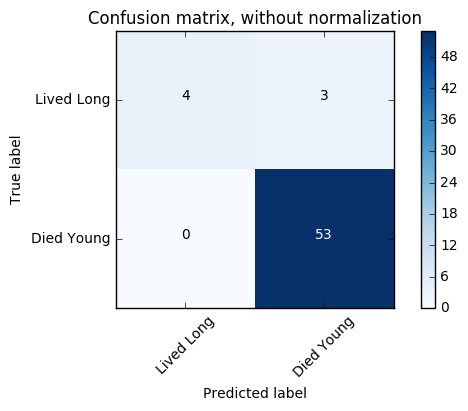

In [20]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Lived Long', 'Died Young'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.57142857  0.42857143]
 [ 0.          1.        ]]


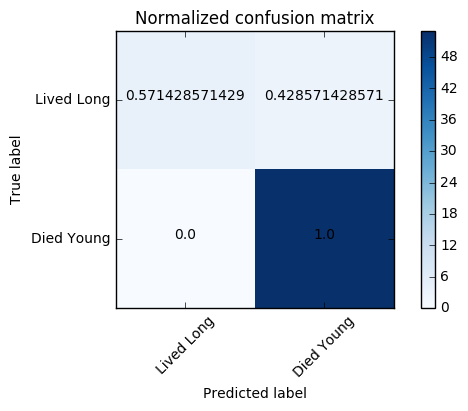

In [21]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Lived Long', 'Died Young'], normalize=True,
                      title='Normalized confusion matrix')

### Model Performance Metrics

#### tp = True Positives
We predicted they would live long, and they did

In [22]:
tp = cnf_matrix[0,0]
tp

4

#### fp = False Positives
We predicted that they would live long, but they did not

In [23]:
fp = cnf_matrix[1,0]
fp

0

#### fn = False Negatives
We predicted they would die young, but they lived long

In [24]:

fn = cnf_matrix[0,1]
fn

3

#### tn = True Negatives
We predicted that they would die young, and they did.

In [25]:
tn = cnf_matrix[1,1]
tn

53

#### p_prime =  Total Positives Predicted
The total that we predicted that would live long

In [26]:
p_prime = tp + fp

#### n_prime = Total Negatives Predicted
The total that we predicted that would die young.

In [27]:
n_prime = tn + fn

#### N = Total Predictions
The total number of predictions made (which matches the total observations in this case)

In [28]:
N = np.sum(cnf_matrix)
N

60

### Model Performance Assessment

#### Error Rate
How many of our predictions were incorrect.

In [29]:
(fp+fn)/N

0.050000000000000003

#### Accuracy
How many of our predictions were correct.

In [30]:
(tp+tn)/N

0.94999999999999996

#### Precision

__Sensitivity__: What percentation of those predictions that we predicted to live long were correct?

In [31]:
tp/p_prime

1.0

__Specificity__: What percentation of those that died young that we predictioned to do so were correct?

In [32]:
tn / n_prime

0.9464285714285714

## Visualizing Model

The following code requires both the installation of hte graphviz python package, but also the graphviz software (graphviz.org). On windows machines, this software also needs to by manually put in your path (the installation doesn't automatically do this for you). 

NOTE: As of Nov. 14th, the Graphviz software is not installed on the classroom computers. It should be installed by Wednesday Nov. 16th. 


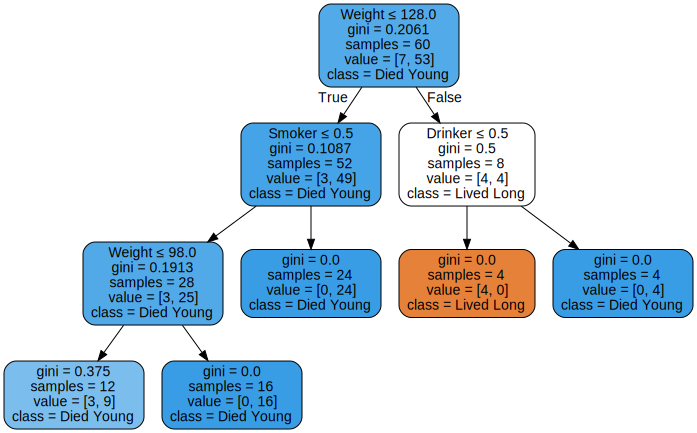

In [33]:
from IPython.display import Image  
import graphviz
dot_data = export_graphviz(clf, out_file="mytree.dot", 
                         feature_names = ['Smoker','Drinker','Weight'],
                         class_names = np.array(['Lived Long', 'Died Young']),
                         filled=True, rounded=True,  
                         special_characters=True)  
with open("mytree.dot") as f:
        dot_graph = f.read()
graphviz.Source(dot_graph)